### Data Analysis - Popularity Score

### Notation

- $K$: number of groups. 
    In this exercise, we have k = 4 (pop_sample1,rock_sample1, hiphop_sample1, country_sample1) 
    
- $X_{ij}$: represents the $j$th observation in the $i$th group.
    For example, we have 100 observations($j$th observations) for the group pop_sample1 (the $i$th group).
    
- $\bar X_{i}$: represents the mean of the $i$th group.
     For example, this is the mean of the $X_{ij}$ for pop_sample. Last, we will have K number of groups.
     
- $\bar X$: represents the mean of all observations from the groups

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import (f, stats)
import math
import seaborn as sns
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)


import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

- Reading CSV file

In [2]:
#Creating artist_codes dataframe
artists = pd.read_csv('Data/spotify_artists_cleaned.csv')

- Setting variables for each parent genres

In [3]:
pop_artists = artists[(artists['pop']==True)]
rock_artists = artists[(artists['rock']==True)]
hiphop_artists = artists[(artists['hiphop']==True)]
country_artists = artists[(artists['country']==True)]

- visualization Popularity Distribution

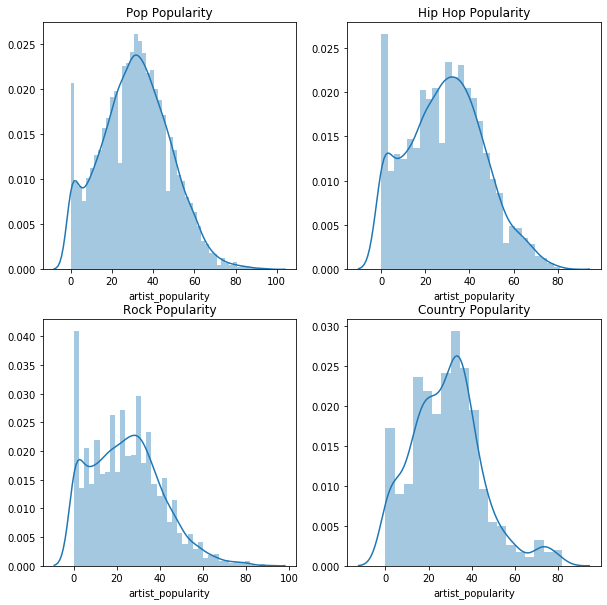

In [4]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(pop_artists.artist_popularity, kde=True)
ax1.set_title('Pop Popularity')

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(hiphop_artists.artist_popularity, kde=True)
ax2.set_title('Hip Hop Popularity')

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(rock_artists.artist_popularity, kde=True)
ax3.set_title('Rock Popularity')

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(country_artists.artist_popularity, kde=True)
ax4.set_title('Country Popularity')

plt.show()

- Visualitation Popularity Boxplot

In [5]:
# Setting the array with the same number of rows to convert to data frame in the next box
pop_array = np.array(pop_artists['artist_popularity'].sample(300))
rock_array = np.array(rock_artists['artist_popularity'].sample(300))
hiphop_array = np.array(hiphop_artists['artist_popularity'].sample(300))
country_array = np.array(country_artists['artist_popularity'].sample(300))

In [6]:
# transforming numpy array to data frame
df_sample_popularity = pd.DataFrame({'pop': pop_array,
                                     'rock': rock_array,
                                     'hip_hop': hiphop_array,
                                     'country': country_array})

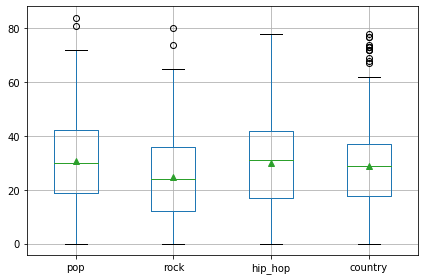

In [7]:
# Boxplot for Populations of pop,rock,hip hop and country 
df_sample_popularity.boxplot(showmeans=True)
plt.tight_layout()

### Notation

- $K$: number of groups. 
    In this exercise, we have k = 4 (pop_sample1,rock_sample1, hiphop_sample1, country_sample1) 
    
- $X_{ij}$: represents the $j$th observation in the $i$th group.
    For example, we have 100 observations($j$th observations) for the group pop_sample1 (the $i$th group).
    
- $\bar X_{i}$: represents the mean of the $i$th group.
     For example, this is the mean of the $X_{ij}$ for pop_sample. Last, we will have K number of groups.
     
- $\bar X$: represents the mean of all observations from the groups

####  Random samples per parent genres as NumPy Array

In [8]:
pop_sample1 = np.array(pop_artists['artist_popularity'].sample(700))
rock_sample1 = np.array(rock_artists['artist_popularity'].sample(300))
hiphop_sample1 = np.array(hiphop_artists['artist_popularity'].sample(300))
country_sample1 = np.array(country_artists['artist_popularity'].sample(200))

- Visualitation of random sample of Popularity for Pop, Rock, Hip Hop and Country

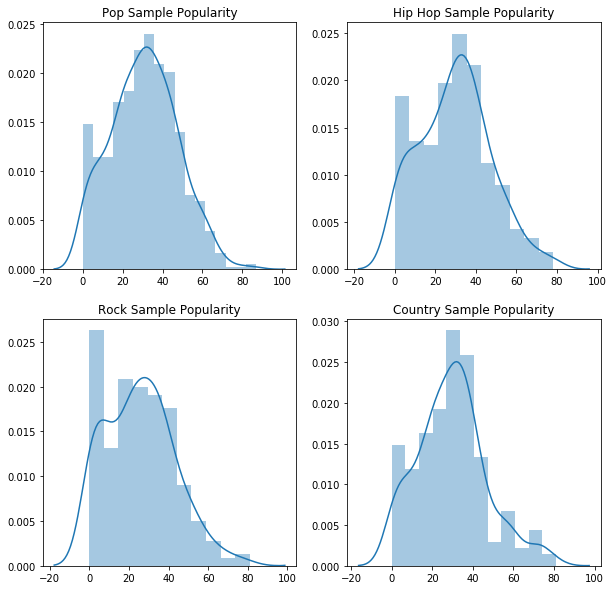

In [34]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(pop_sample1, kde=True)
ax1.set_title('Pop Sample Popularity')

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(hiphop_sample1, kde=True)
ax2.set_title('Hip Hop Sample Popularity')

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(rock_sample1, kde=True)
ax3.set_title('Rock Sample Popularity')

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(country_sample1, kde=True)
ax4.set_title('Country Sample Popularity')

plt.show()

### $K$ Groups

Number of Groups: 4
 - Pop_sample1
 - Rock_sample1
 - hiphop_sample1
 - country_sample1


In [9]:
genres_samples = [pop_sample1, rock_sample1, hiphop_sample1, country_sample1]
k = len(genres_samples)


### $X_{ij}$ Number of observations withing each group:

In [10]:
pop_x1 = len(pop_sample1) 
rock_x2 = len(rock_sample1)
hiphop_x3 = len(hiphop_sample1)
country_x4 = len(country_sample1)

### $\bar X$ Mean from all observations from groups

In [11]:
x_all  = np.concatenate([pop_sample1,
                rock_sample1, 
                hiphop_sample1,
                country_sample1], axis=0)

x_bar = x_all.mean()

ss_total = ((x_all - x_bar)**2).sum()

## Sum of Squares 

- Sum of Squares for Treatments (SST)
- Sum of Squares for Erro (SSE)

#### For SST

In [12]:
group_list_t = [pop_sample1,
               rock_sample1, hiphop_sample1, country_sample1]

preview_sst = ([len(sample)*(sample.mean() - x_bar)**2 for sample in group_list_t])

- Final sum between groups 

In [13]:
final_sst = np.sum(preview_sst)

#### For SSE

In [14]:
sample_list_e = [pop_sample1,
               rock_sample1, hiphop_sample1, country_sample1]

preview_sse = ([((sample - sample.mean())**2).sum() for sample in sample_list_e])

- Final sum within groups

In [15]:
final_sse = np.sum(preview_sse)

## Degrees of Freedom

- Degrees of Freedom for Treatments (k - 1)
- Degrees of Freedom for Error (n - k)

#### For (k -1)

In [16]:
df_treatments = (k - 1) 

#### For (n - k)

In [17]:
df_error = (pop_x1 + rock_x2 + hiphop_x3 + country_x4) - k

### F Score

- For MST

In [18]:
mst = final_sst / df_treatments

- For MSE

In [19]:
mse = final_sse / df_error

- F Score ratio

In [20]:
f_score = mst / mse

In [21]:
f_score

6.532762481208703

### P-Value

In [22]:
p_value = 1 - f.cdf(f_score, df_treatments, df_error)

In [23]:
p_value

0.0002177738548132524

### One-Way Anova test 

In [24]:
f_score_anova, p_value_anova = stats.f_oneway(pop_sample1,
                                              rock_sample1, 
                                              hiphop_sample1, 
                                              country_sample1)
print('f-score:', f_score_anova)
print('p-value:', p_value_anova)

f-score: 6.532762481208701
p-value: 0.0002177738548132138


### Tukey's Multi-Comparison Method

#### Convert NumPy array to data frame

In [25]:
pop_df = pd.DataFrame(pop_sample1)
pop_df = pop_df.rename(columns={0: 'popularity'})
pop_df['genre'] = 'pop'
pop_df['id'] = 0

rock_df = pd.DataFrame(rock_sample1)
rock_df = rock_df.rename(columns={0: 'popularity'})
rock_df['genre'] = 'rock'
rock_df['id'] = 1

hiphop_df = pd.DataFrame(hiphop_sample1)
hiphop_df = hiphop_df.rename(columns={0: 'popularity'})
hiphop_df['genre'] = 'hiphop'
hiphop_df['id'] = 2

country_df = pd.DataFrame(country_sample1)
country_df = country_df.rename(columns={0: 'popularity'})
country_df['genre'] = 'country'
country_df['id'] = '3'

combined_sample_df = pd.concat([pop_df, rock_df, hiphop_df, country_df], axis=0)

#### Set up the data for comparison (creates a specialised object)

In [26]:
MultiComp = MultiComparison(combined_sample_df['popularity'],
                           combined_sample_df['genre'])

print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
country hiphop  -0.1033    0.9 -4.1054  3.8988  False
country    pop   1.0657 0.8475 -2.4494  4.5808  False
country   rock  -4.1133 0.0413 -8.1154 -0.1112   True
 hiphop    pop    1.169 0.7274 -1.8563  4.1943  False
 hiphop   rock    -4.01 0.0209 -7.5896 -0.4304   True
    pop   rock   -5.179  0.001 -8.2043 -2.1537   True
-----------------------------------------------------


### Welch's t-test

- T test Pop and Rock

In [27]:
stats.ttest_ind(pop_sample1, rock_sample1, equal_var=False)

Ttest_indResult(statistic=4.368884835897312, pvalue=1.4964684805053427e-05)

- T test Pop and Hip Hop

In [28]:
stats.ttest_ind(pop_sample1, hiphop_sample1, equal_var=False)

Ttest_indResult(statistic=0.9788268669203694, pvalue=0.32810550975301966)

- T test Pop and Country

In [29]:
stats.ttest_ind(pop_sample1, country_sample1, equal_var=False)

Ttest_indResult(statistic=0.781372204383856, pvalue=0.4351720045291937)

- T test Rock and Hip Hop 

In [30]:
stats.ttest_ind(rock_sample1, hiphop_sample1, equal_var=False)

Ttest_indResult(statistic=-2.806133444729611, pvalue=0.005177268097824921)

- T test Rock and Country

In [31]:
stats.ttest_ind(rock_sample1, hiphop_sample1, equal_var=False)

Ttest_indResult(statistic=-2.806133444729611, pvalue=0.005177268097824921)

- T test Hip Hop and Country

In [32]:
stats.ttest_ind(hiphop_sample1, country_sample1, equal_var=False)

Ttest_indResult(statistic=-0.06539250801521929, pvalue=0.9478915653048092)